# Étude de cas

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from numpy import array, identity, transpose, matmul, std, mean
from numpy.linalg import eig

from scripts.main import parse_csv, k_means
import scripts.visualisation as vis


On commence par parser les données de `Country-data.csv` et on en extrait le nom des colonnes, le nom de chaque pays et les données numériques associées. On en profite pour visualiser rapidement les features pour avoir une idée du contenu des données.

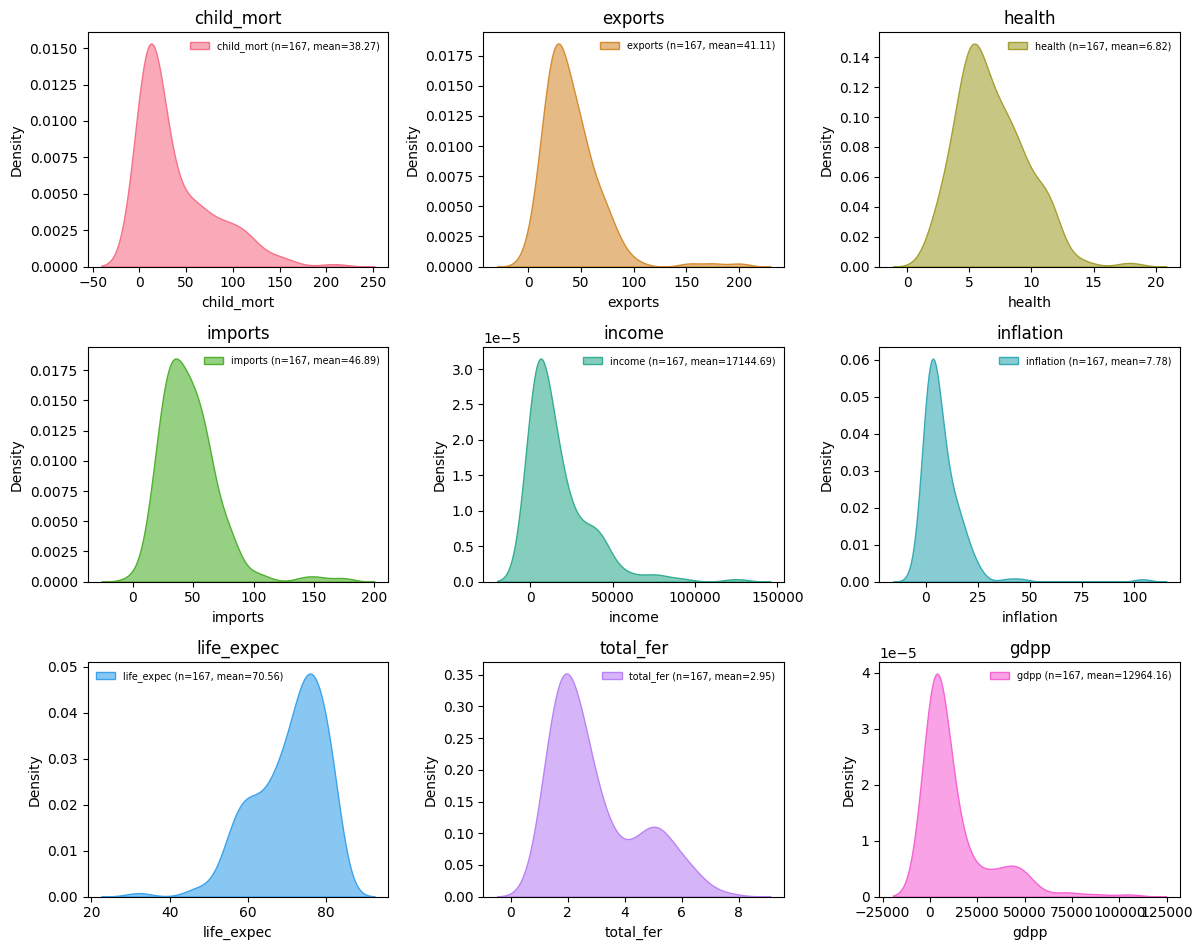

In [2]:
data_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))), 'data', 'Country-data.csv')
data = parse_csv(data_path, ignore_headers=False) # Here, data contains something like [['Afghanistan', 90.2, 10.0, 7.58, 44.9, ...]

# Split the list into three lists: headers, country names and numerical data
headers = data[0]
country_names = [row[0] for row in data[1:]]
numerical_data = [row[1:] for row in data[1:]]

# Create a pandas DataFrame for visualization purposes
df_country = pd.DataFrame(data[1:], columns=headers)
vis.plot_feature_distributions(df=df_country)

## Principal Component Analysis (PCA)

Comme on le voit dans la visualisation ci-dessus, les données sont caractérisées par 9 variables différentes. Hors, on ne peut pas visualiser des données en 9 dimensions. Également, certaines variables ont des échelles très différentes.

Pour palier à ces problèmes, on va utiliser plusieurs techniques:
- Centrer et réduire les données pour régler les problèmes d'échelles
- Effectuer une **analyse en composantes principales** pour réduire la dimension des données sans perdre trop d'information

In [3]:
# Squelette de programme provenant du sujet

X = array(numerical_data)

# Le nombre de points
n = len(numerical_data)

# Le nombre de variables
p = len(headers) - 1

# La matrice des données centrées, c’est-à-dire la somme = 0 sur chaque colonne
Y = X - matmul(transpose(array([n * [1]])), transpose(array([[mean(variable)] for variable in transpose(X)])))

# La matrice des données centrées et réduites, qui en plus a l’écart type constant = 1 sur chaque colonne
Z = matmul (Y, array(list(map (lambda variable : [1./std(variable)], transpose(X)))) * identity(p))

# La matrice (symétrique) de variance/covariance des données centrées réduites
R = matmul (matmul(transpose(Z), 1./n * identity (n)), Z)

# Les vecteurs propres de R
eigenvectors = eig(R)[1]

# Les 2 composantes principals = 2 nouvelles variables contenant le plus d’information possible des 9 variables initiales
components = [matmul(Z, eigenvectors[:,0]), matmul(Z, eigenvectors[:,1])]

# La matrice initiale, projetée sur 2 nouvelles colonnes qui représentent les 2 composantes principales
data_reduced = [[components[0][i], components[1][i]] for i in range(n)]

print(data_reduced)

[[np.float64(2.913024587396588), np.float64(-0.09562057550551217)], [np.float64(-0.4299113299319383), np.float64(0.5881556664216984)], [np.float64(0.2852250773700539), np.float64(0.4551744133397677)], [np.float64(2.9324226542292737), np.float64(-1.6955550705215487)], [np.float64(-1.0335758664708328), np.float64(-0.13665870884235135)], [np.float64(-0.022407261573743925), np.float64(1.779186575829488)], [np.float64(0.10158373658107384), np.float64(0.5682517238414162)], [np.float64(-2.3421646096858817), np.float64(1.9884591539619931)], [np.float64(-2.9737636642043057), np.float64(0.734688658607829)], [np.float64(0.18148699731199217), np.float64(0.402865873483636)], [np.float64(-1.2687438639868236), np.float64(0.6565883632526904)], [np.float64(-1.670996395911488), np.float64(-0.5611624925384958)], [np.float64(1.1238509345045717), np.float64(0.9613974045352938)], [np.float64(-1.0813741969947284), np.float64(0.481969530136348)], [np.float64(-0.5800251522399523), np.float64(-0.535326833980048

## Génération des figures

Maintenant que l'on a un jeu de données centré, réduit, et avec seulement deux dimensions, on peut générer des visualisations. De la même manière que dans les exercices précédents, on va donc générer :
- Deux visualisations de clustering k-means , avec respectivement `k=2`et `k=3`
- Deux visualisations de clustering hiérarchique, pour single link et complete link

Initialized centroids:
[[-1.10860101 -1.00931426]
 [-0.12114612  1.76890914]]
Iteration 1 / 100
 Cluster sizes: [78 89]
 Centroid shifts: [0.47002607 1.30754119] max: 1.3075411901184977
Iteration 2 / 100
 Cluster sizes: [72 95]
 Centroid shifts: [0.90273122 0.65627275] max: 0.9027312201396755
Iteration 3 / 100
 Cluster sizes: [73 94]
 Centroid shifts: [0.54281336 0.43188617] max: 0.5428133602303716
Iteration 4 / 100
 Cluster sizes: [72 95]
 Centroid shifts: [0.05714838 0.03898864] max: 0.0571483766523231
Iteration 5 / 100
 Cluster sizes: [73 94]
 Centroid shifts: [0.0368599  0.02870918] max: 0.036859898117415815
Iteration 6 / 100
 Cluster sizes: [75 92]
 Centroid shifts: [0.05705237 0.0471549 ] max: 0.0570523681168884
Iteration 7 / 100
 Cluster sizes: [77 90]
 Centroid shifts: [0.04244317 0.03689077] max: 0.042443171646041986
Iteration 8 / 100
 Cluster sizes: [81 86]
 Centroid shifts: [0.08623771 0.08337008] max: 0.08623770648952164
Iteration 9 / 100
 Cluster sizes: [86 81]
 Centroid s

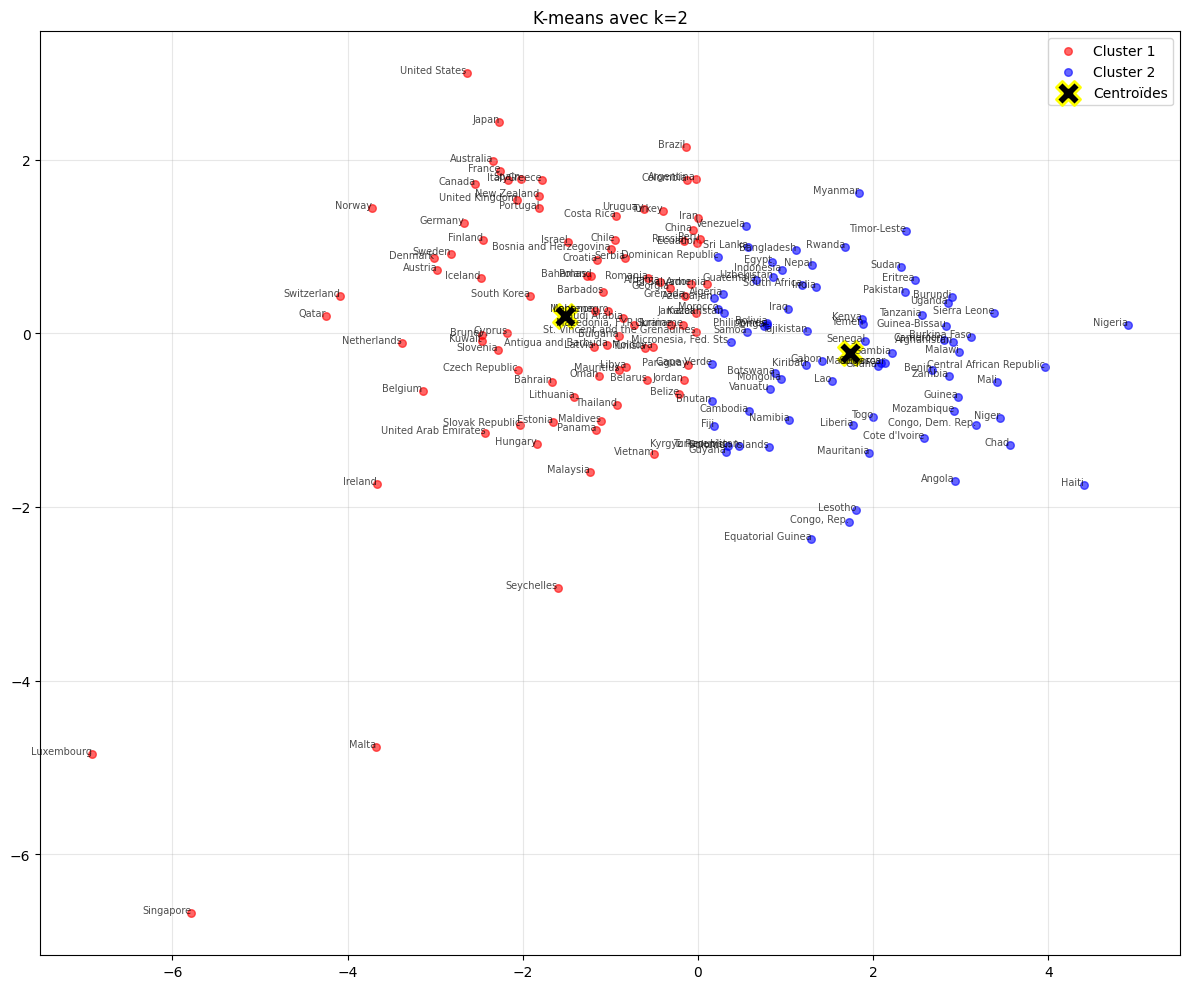

Initialized centroids:
[[-1.91806245  0.42746824]
 [-5.7833763  -6.68209028]
 [-1.26874386  0.65658836]]
Iteration 1 / 100
 Cluster sizes: [ 35   3 129]
 Centroid shifts: [0.54844891 1.29072441 2.13116499] max: 2.1311649859978083
Iteration 2 / 100
 Cluster sizes: [ 57   3 107]
 Centroid shifts: [0.49243282 0.         0.42219017] max: 0.4924328158024751
Iteration 3 / 100
 Cluster sizes: [67  3 97]
 Centroid shifts: [0.21105991 0.         0.18681487] max: 0.21105991309936753
Iteration 4 / 100
 Cluster sizes: [75  3 89]
 Centroid shifts: [0.16675795 0.         0.15740251] max: 0.16675795106287092
Iteration 5 / 100
 Cluster sizes: [83  3 81]
 Centroid shifts: [0.14398749 0.         0.1659672 ] max: 0.16596719550463104
Iteration 6 / 100
 Cluster sizes: [87  3 77]
 Centroid shifts: [0.068105   0.         0.08785036] max: 0.0878503604536937
Iteration 7 / 100
 Cluster sizes: [89  3 75]
 Centroid shifts: [0.03525984 0.         0.04395509] max: 0.04395509192910596
Iteration 8 / 100
 Cluster size

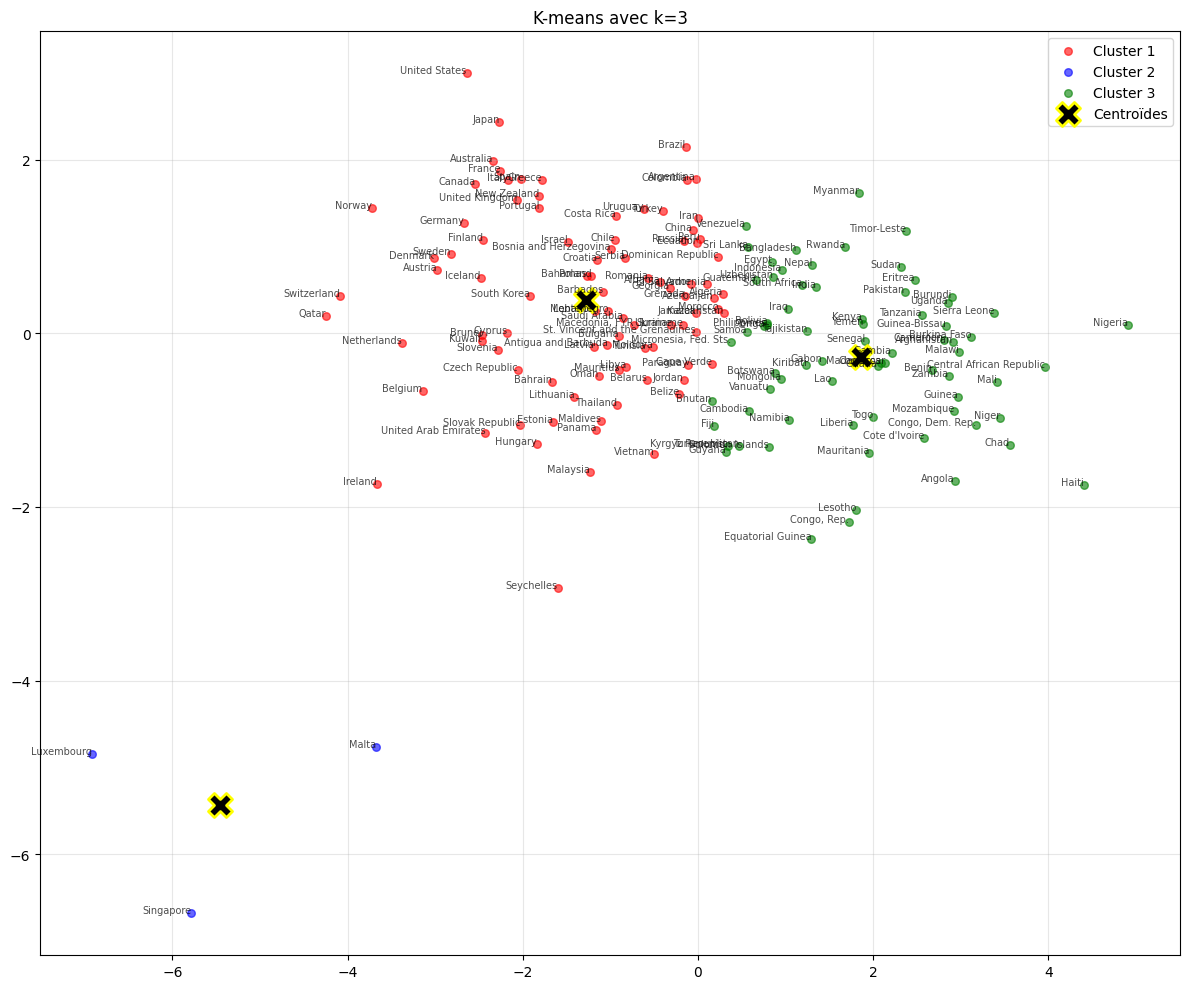

In [4]:
data_array = np.array(data_reduced)

# K-means avec k=2
centroids_k2, sse_k2 = k_means(data_reduced, 2)

# Labels
distances_k2 = np.linalg.norm(data_array[:, None, :] - centroids_k2[None, :, :], axis=2)
labels_k2 = np.argmin(distances_k2, axis=1)

# Visualisation
vis.plot_kmeans_clusters(data_array, labels_k2, centroids_k2, country_names=country_names, title='K-means avec k=2')

# K-means avec k=3
centroids_k3, sse_k3 = k_means(data_reduced, 3)

# Labels
distances_k3 = np.linalg.norm(data_array[:, None, :] - centroids_k3[None, :, :], axis=2)
labels_k3 = np.argmin(distances_k3, axis=1)

# Visualisation
vis.plot_kmeans_clusters(data_array, labels_k3, centroids_k3, country_names=country_names, title='K-means avec k=3')

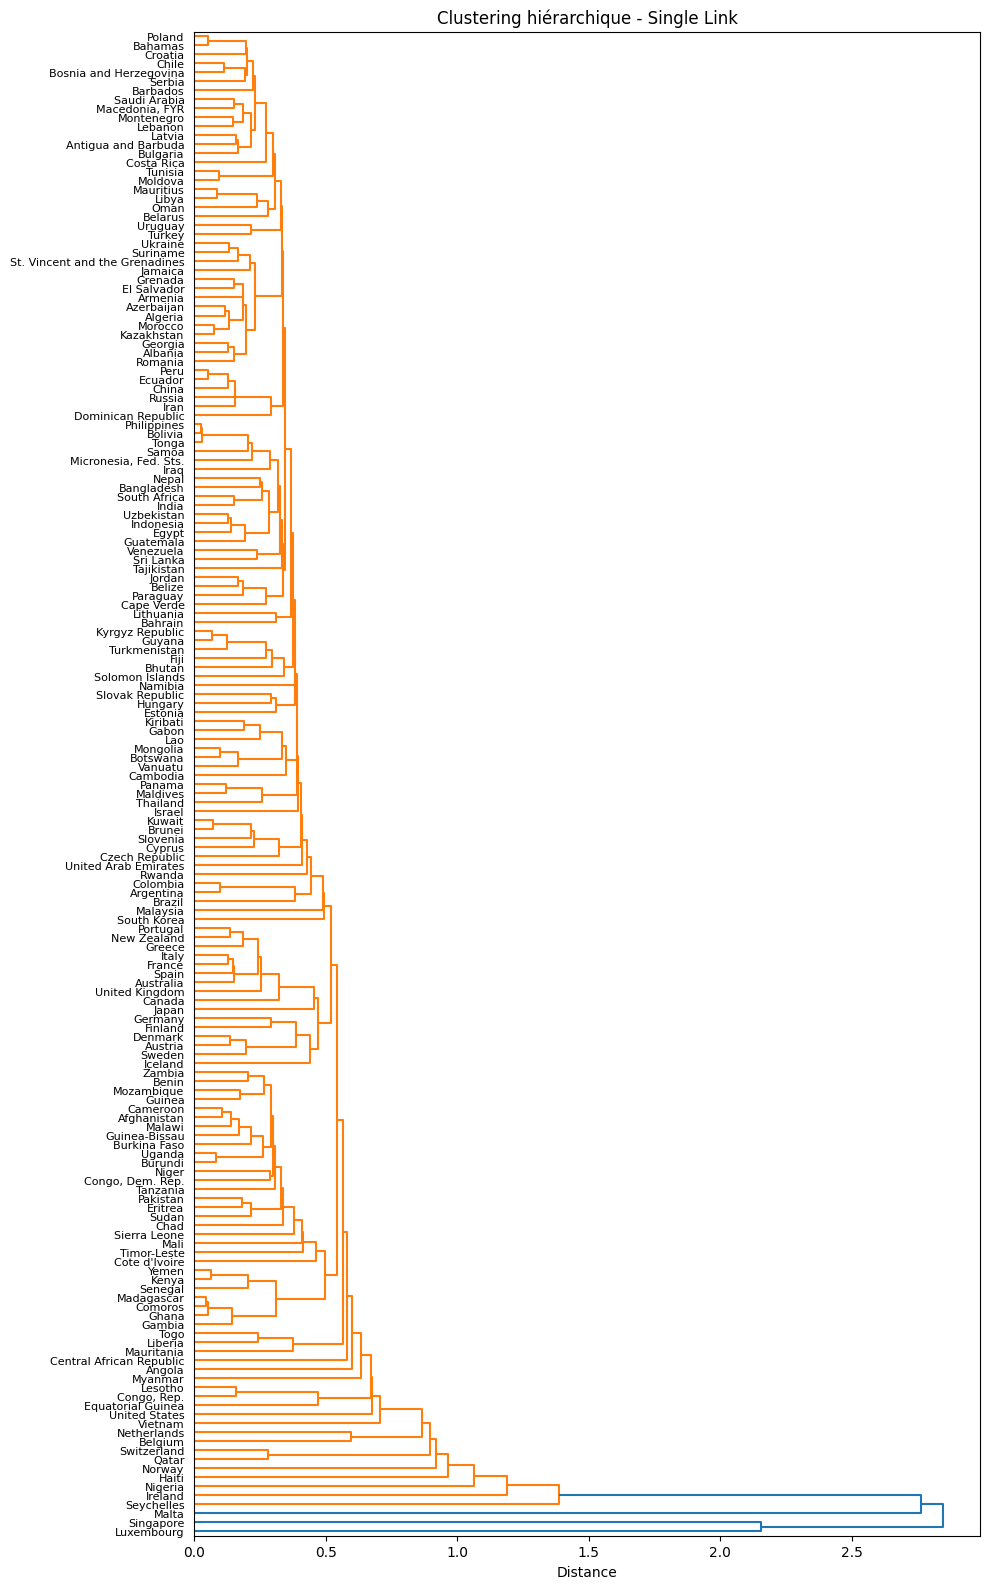

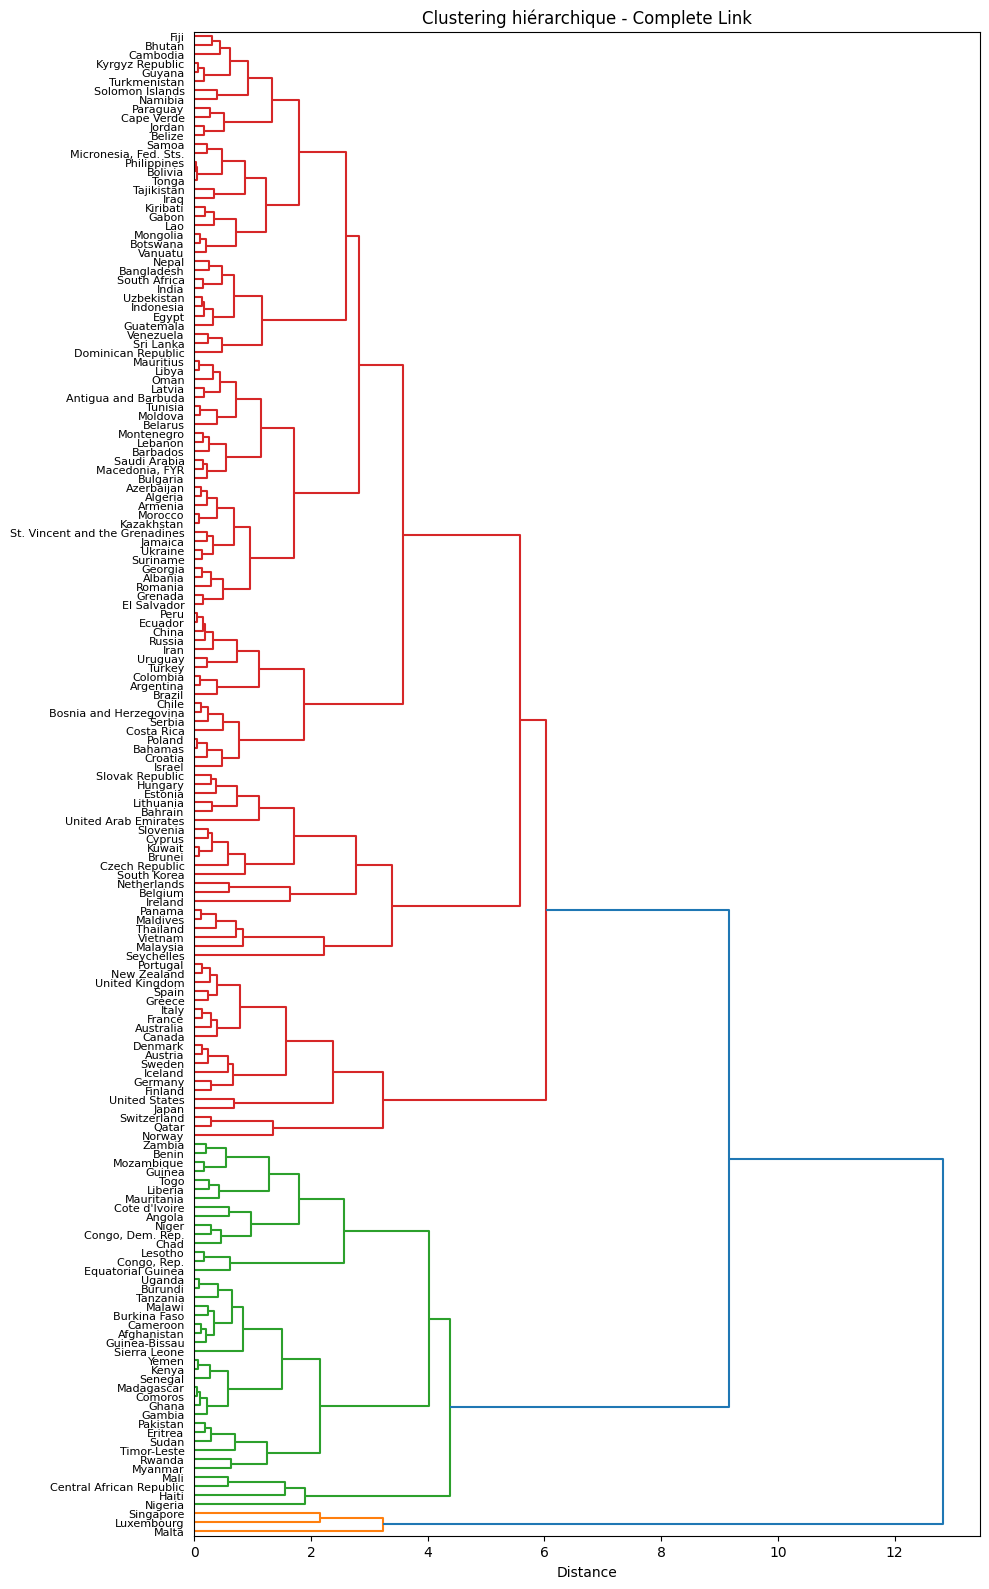

In [6]:
# Clustering hiérarchique
single_link = linkage(data_reduced, method='single')
complete_link = linkage(data_reduced, method='complete')

# Visualisations
vis.plot_hierarchical_dendrogram(single_link, labels=country_names, method_name='Single Link', orientation='right')

vis.plot_hierarchical_dendrogram(complete_link, labels=country_names, method_name='Complete Link', orientation='right')